In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

#sklearn packages
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [3]:
#importing data
train_data = pd.read_csv('C:/Users/Nikita/OneDrive/Desktop/Course_Materials/Data Mining Techniques/Assignments/data-mining-techniques/task2_titanic/titanic_data/train.csv')
test_data = pd.read_csv('C:/Users/Nikita/OneDrive/Desktop/Course_Materials/Data Mining Techniques/Assignments/data-mining-techniques/task2_titanic/titanic_data/test.csv')
combine = [train_data, test_data]

In [7]:
#features are listed in the data set:
#PassengerID, Survived, Pclass, Name, Sex, Age, Sibsp, Parch, Ticket, Fare, Cabin and Embarked
print(train_data.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [8]:
#data types
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
train_data.shape

(891, 12)

In [14]:
#Check number of missing values for each column in training set
train_data.isnull().sum()
#Age, Cabin and Embarked have missing values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [16]:
#Check number of missing values for each column in test set
test_data.isnull().sum()
# Age, Fare and, Cabin have missing values

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### Features that could contribute to a high survival rate
Pclass (socio-econimic status) (Fare is directly realted to Pclass), Sex, and Age.

In [17]:
#survival rate by Pclass
train_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Around 62% of 1st class passengers survived compared to 47% and 24% for 2nd and 3rd class passengers respectively

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

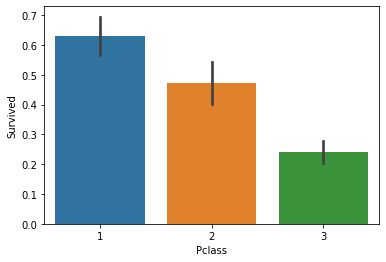

In [18]:
sns.barplot(x='Pclass',y='Survived',data=train_data)

In [19]:
#survival rate based on sex 
train_data[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


Almost 75% of feamles survived, compared to 19% for males 

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

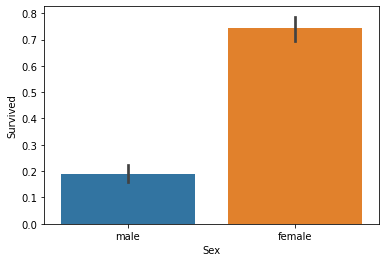

In [20]:
sns.barplot(x='Sex',y='Survived',data=train_data)

## Cleaning Data

#### Converting categorical data into numerical

In [28]:
#for dataset in combine:
        #dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
        
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [34]:
#177 data points for age were missing. 
#To correct this, randomized age data is generated using the mean age and standard deviation of the data 

# mean and std of Age
mean_age = train_data['Age'].mean() #29.69911764705882 = 29.7
std_age = train_data['Age'].std() #14.526497332334044 = 14.5

#number of missing values (non number values) for Age
non_num = train_data['Age'].isna().sum() #177

#generating random ages from mean and standard dev
random_age = mean_age + std_age * np.random.randn(non_num)

#replace missing values with random_age(random values)
train_data.loc[train_data['Age'].isna(), 'Age'] = random_age

In [35]:
train_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,5.965398,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",0,32.000000,0,0,370376,7.75,NaN,Q


In [36]:
train_data.isnull().sum() #Now 'Age' does not have any missing values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [37]:
# Doing the same for test data, replacing missing values for age
# mean and std of Age
test_mean_age = test_data['Age'].mean() #30.272590361445783 = 30.3
test_std_age = test_data['Age'].std() #14.18120923562442 = 14.2

#number of missing values (non number values) for Age
test_non_num = test_data['Age'].isna().sum() #86

#generating random ages from mean and standard dev
test_random_age = test_mean_age + test_std_age * np.random.randn(test_non_num)

#replace missing values with random_age(random values)
test_data.loc[test_data['Age'].isna(), 'Age'] = test_random_age

In [41]:
test_data.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",0,58.640745,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,39.000000,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",0,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",0,28.140347,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",0,23.253300,1,1,2668,22.3583,NaN,C


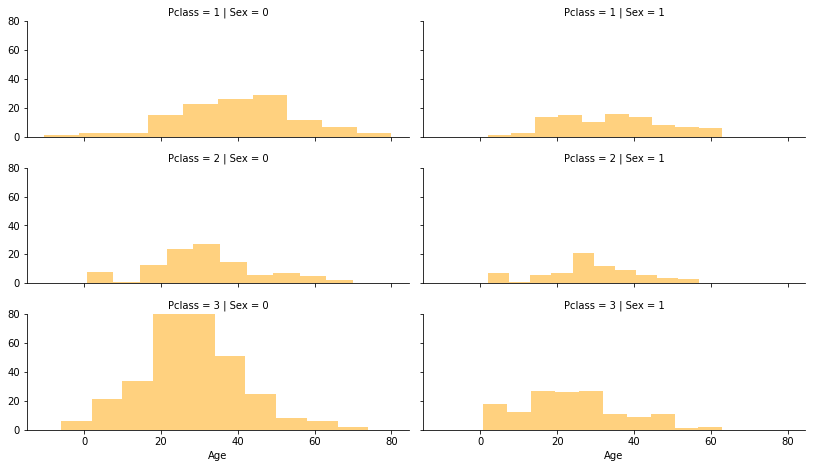

In [43]:
grid = sns.FacetGrid(train_data, row= 'Pclass', col= 'Sex', height = 2.2, aspect = 2.6)
grid.map(plt.hist, 'Age', alpha= .5, bins=10, color= 'orange')
plt.ylim((0,80))
grid.add_legend()

#### Replacing missing categorical data for 'Embarked'

In [44]:
#most frequently used port
port = train_data.Embarked.dropna().mode()[0]
port #'S', i.e., S = Southampton is the most common port used

'S'

In [45]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(port)
    

In [46]:
#Checking survival rate by port used
train_data[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


About 55% of passengers that used the port C = Cherbourg survived compared to 39% for Q = Queenstown, and 34% for S = Southampton

In [47]:
train_data['Embarked'].isnull().sum() # No more missing values for Embarked

0

In [48]:
#converting categorical 'Embarked' to numeric
#this creates a unifying data type for analysis

# S = Southampton = 0, C = Cherbourg = 1, Q = Queenstown = 2

for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)


In [52]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0


In [53]:
#converting Fare from float to int64

for dataset in combine:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [54]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8,NaN,0


In [56]:
#converting Age from float to int64

for dataset in combine:
    dataset['Age'] = dataset['Age'].fillna(0)
    dataset['Age'] = dataset['Age'].astype(int)

In [57]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8,NaN,0


#### Dropping columns with mixed data types and missing values, which do not seem to affect survival rate significantly

In [62]:
#train_df = train_df.drop(['PassengerId'], axis=1)
#df.drop(df.columns[[0, 4, 2]], axis = 1, inplace = True)
train_df = train_data.drop(train_data.columns[['Ticket', 'Cabin', 'Name',]], axis=1, inplace = True)
test_df = test_data.drop(test_data.columns[['Ticket', 'Cabin', 'Name',]], axis=1, inplace = True)
combine_data = [train_df, test_df]
#train_df.shape,test_df.shape

C:\Users\Nikita\anaconda3\lib\site-packages\pandas\core\indexes\base.py:5055: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [65]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22,1,0,7,0
1,2,1,1,1,38,1,0,71,1
2,3,1,3,1,26,0,0,7,0
3,4,1,1,1,35,1,0,53,0
4,5,0,3,0,35,0,0,8,0


In [66]:
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,34,0,0,7,2
1,893,3,1,47,1,0,7,0
2,894,2,0,62,0,0,9,2
3,895,3,0,27,0,0,8,0
4,896,3,1,22,1,1,12,0


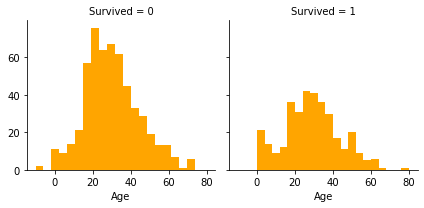

In [68]:
# Age and survival rate 'Survived'= 0 = No, 'Survived'= 1 = Yes
age_hist = sns.FacetGrid(train_data, col= 'Survived')
age_hist.map(plt.hist, 'Age', bins = 20, color = "Orange")

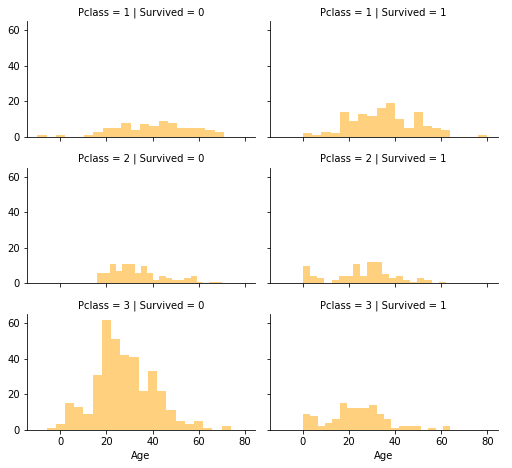

In [71]:
# Survival rate by Age and Passenger class
grid = sns.FacetGrid(train_data, col = 'Survived', row = 'Pclass', height = 2.2, aspect = 1.6)
grid.map(plt.hist, 'Age', alpha = .5, bins = 20, color = "Orange")
grid.add_legend();

C:\Users\Nikita\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\Nikita\anaconda3\lib\site-packages\seaborn\axisgrid.py:675: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


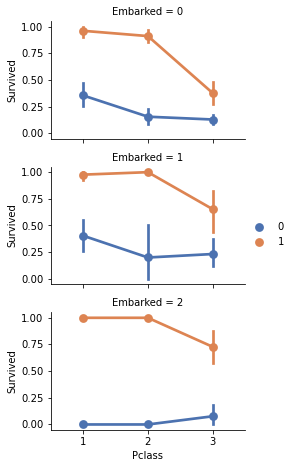

In [73]:
#Survival by Sex, Passenger Class and Embarking Port
grid = sns.FacetGrid(train_data, row='Embarked', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

In [74]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  891 non-null    int64
 1   Survived     891 non-null    int64
 2   Pclass       891 non-null    int64
 3   Sex          891 non-null    int32
 4   Age          891 non-null    int32
 5   SibSp        891 non-null    int64
 6   Parch        891 non-null    int64
 7   Fare         891 non-null    int32
 8   Embarked     891 non-null    int32
dtypes: int32(4), int64(5)
memory usage: 48.9 KB


### Prediction Models

In [75]:
X_train = train_data.drop("Survived", axis=1)
Y_train = train_data["Survived"]
X_test  = test_data.drop("PassengerId", axis=1).copy()

In [76]:
X_train = X_train.drop("PassengerId", axis=1)

#### Logistic Regression

Logistic regression is a statisical model used to handle classification problems. Logistic regression is a process of modeling the probablity of a discrete outcome given an input variable. In other words it measures the realatoinship between the categorical depedent feature and one of more independent features.

In [77]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


80.36

#### Decision Tree

Decision Trees are a non-parametric surpervised learning method used for classifications and regression.The goal is to use a tree like model to evaluate decisions and their possible outcomes including things such as probablity, cost, and other relavent features. Decision tree models

In [78]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

97.08

#### Random Forest

The random forest analysis is a classification algorithm consisting of many decision trees. However is utilizes a bagging method and randomness features.

In [79]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

97.08

#### K-Nearest Neighbor

The K-nearest Neighbor algorithm is a data classification method for estimating the likelihood of the data point will beocome a member of one group or another based on what the group data points nearest to is belong to.

In [80]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

82.04

In [84]:
#Y_pred

#### Model evalution

In [85]:
models = pd.DataFrame({
   'Model': ['KNN', 'Logistic Regression', 'Random Forest',  'Decision Tree'],
    'Score': [ acc_knn, acc_log, acc_random_forest, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Random Forest,97.08
3,Decision Tree,97.08
0,KNN,82.04
1,Logistic Regression,80.36


In [82]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score


In [ ]:
# scores = cross_val_score(model, X, y, scoring='accuracy', n_jobs=-1)
# X = features.loc[:, features.columns != 'label']
# y = features['label']

# scores = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
# scores
